In [167]:
#import dataframe
import pandas as pd

# read the Excel file into a Pandas dataframe
df = pd.read_excel('SalesOfMedicalDevices.xlsx')

# print the first few rows of the dataframe
df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1


In [168]:
################################ DATA PREPARATION, EXPLORATION, PREPROCESSING #################################################

In [169]:
import pandas as pd

# Check the size of the dataset
print('Dataset size:\n\n', df.shape)
print()
print('---------------------------')
print()

# Check the data types of each variable
print('Data types:\n\n', df.dtypes)
print()
print('---------------------------')
print()

#Check the unique values for each column
print('Unique Values\n\n')
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"Unique values for column '{column}': {unique_vals}\n")
    
print()
print('---------------------------')
print()
    
# Check for missing values
print('Missing values:\n\n', df.isnull().sum())
print()
print('---------------------------')
print()

# Calculate summary statistics
print('Summary statistics:\n\n', df.describe())
print()
print('---------------------------')
print()

# Check for duplicates
print(f'Number of duplicates:\n',df.duplicated().sum())
print()
print('---------------------------')
print()

# Check the correlation matrix
print(f'Correlation matrix\n\n',df.corr())

Dataset size:

 (611, 6)

---------------------------

Data types:

 Customer                int64
year                    int64
NoOfSalesCalls          int64
NoOfTargetedEmails      int64
NoOfSales               int64
CustomerSatisfaction    int64
dtype: object

---------------------------

Unique Values


Unique values for column 'Customer': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]

Unique values for column 'year': [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]

Unique values for column 'NoOfSalesCalls': [1 3 2 0 4 5]

Unique values for column 'NoOfTargetedEmails': [2 1 3 0]

Unique values for column 'NoOfSales': [3 0 1 2 4]

Unique values for column 'CustomerSatisfaction': [-1  1  0]


---------------------------

Missing values:

 Customer                0
year                    0
NoOfSalesCalls          0
NoOfTargetedEmails      0
NoOfSales               0
Cu

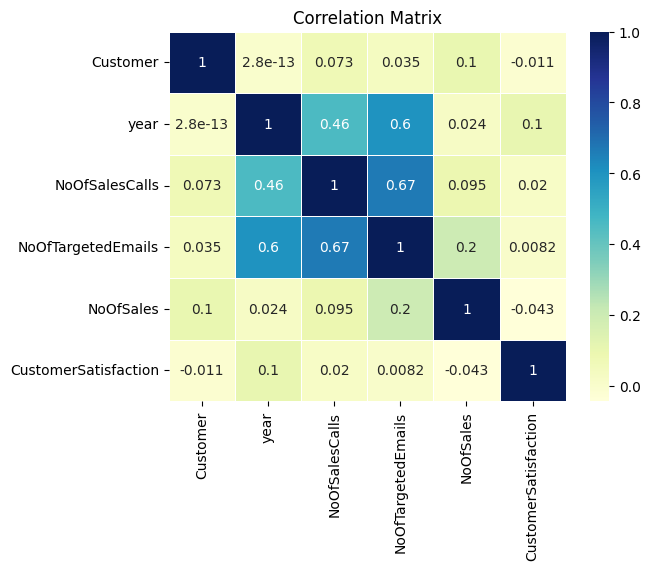

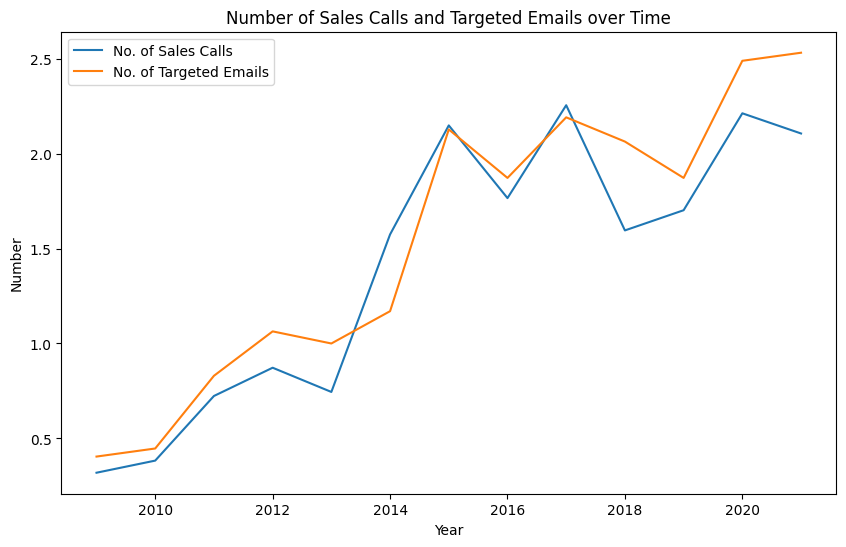

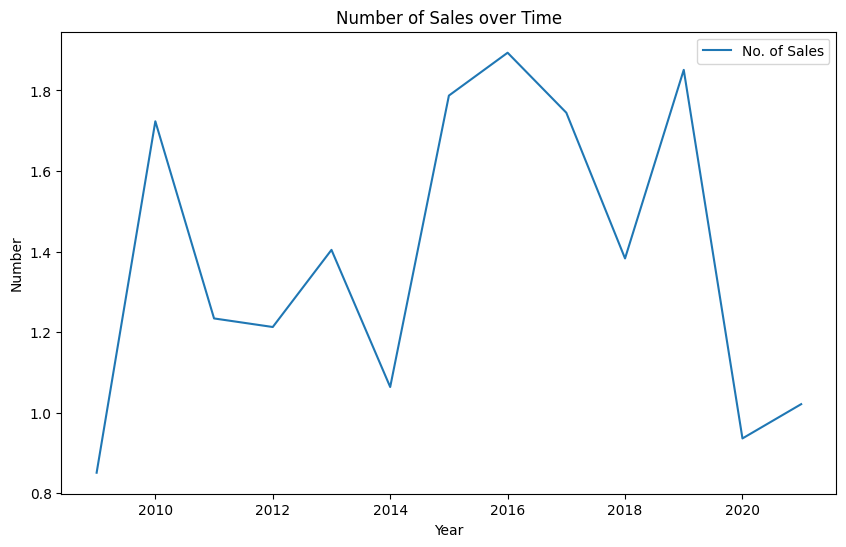

In [170]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Plot a line chart of the number of sales calls and targeted emails over time
sales_calls = df.groupby('year')['NoOfSalesCalls'].mean()
targeted_emails = df.groupby('year')['NoOfTargetedEmails'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sales_calls, label='No. of Sales Calls')
ax.plot(targeted_emails, label='No. of Targeted Emails')
ax.set_title('Number of Sales Calls and Targeted Emails over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.legend()
plt.show()

# Plot a line chart of the number of sales calls and targeted emails over time
sales_calls = df.groupby('year')['NoOfSales'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sales_calls, label='No. of Sales')
#ax.plot(targeted_emails, label='No. of Targeted Emails')
ax.set_title('Number of Sales over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.legend()
plt.show()

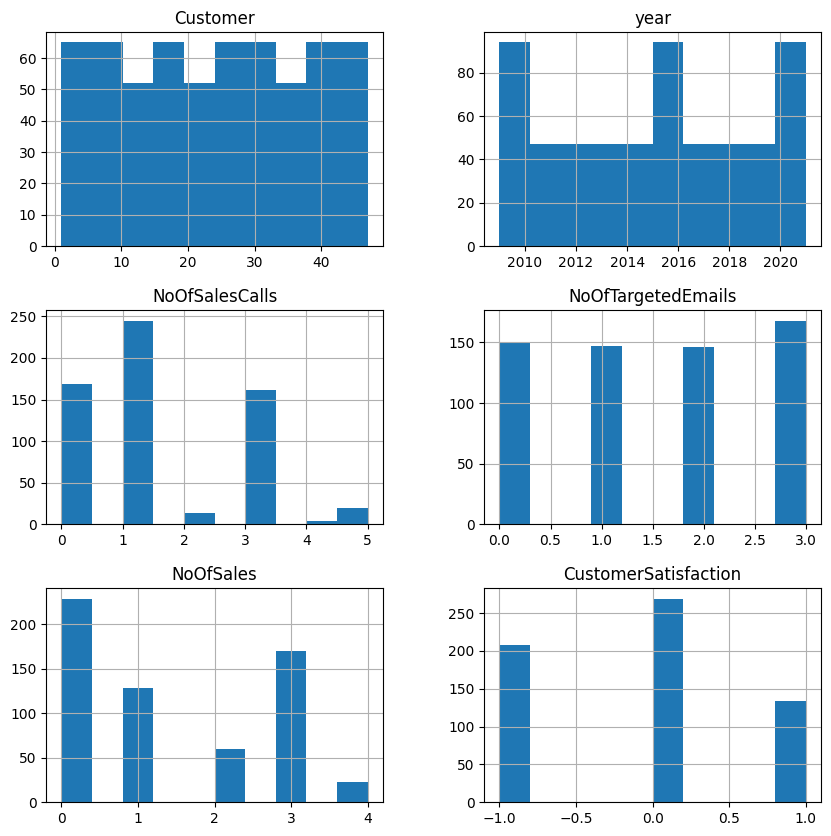

In [171]:
# Visualize the distribution of each numerical variable using histograms
df.hist(bins=10, figsize=(10,10))
plt.show()

In [172]:
# Check for skewness
skewness = df.skew()

# Print the skewness of each column
print(skewness)

Customer                0.000000
year                    0.000000
NoOfSalesCalls          0.781912
NoOfTargetedEmails     -0.046976
NoOfSales               0.348427
CustomerSatisfaction    0.196070
dtype: float64


     NoOfSalesCalls  NoOfTargetedEmails  NoOfSales  CustomerSatisfaction
0             False               False      False                 False
1             False               False      False                 False
2             False               False      False                 False
3             False               False      False                 False
4             False               False      False                 False
..              ...                 ...        ...                   ...
606           False               False      False                 False
607           False               False      False                 False
608           False               False      False                 False
609           False               False      False                 False
610           False               False      False                 False

[611 rows x 4 columns]


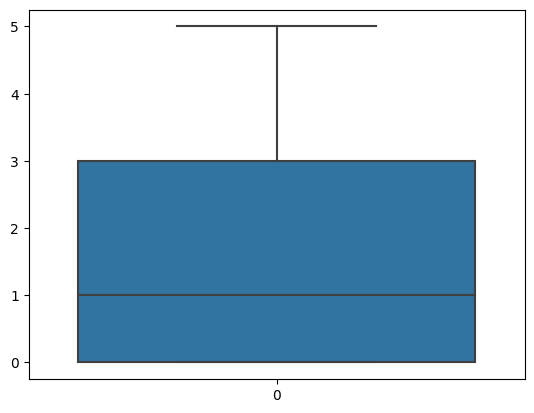

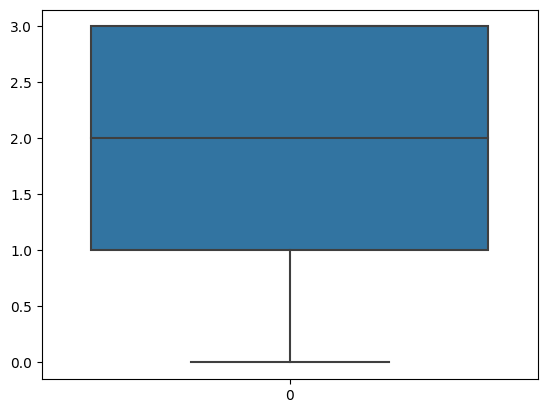

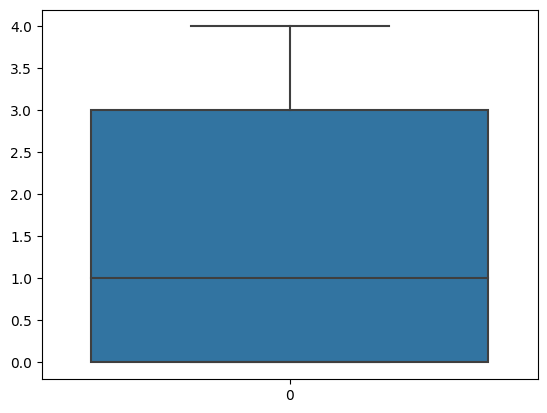

In [173]:
import numpy as np

# Define a function to detect outliers using IQR method
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

# Select only numerical columns
numerical_cols = ['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']
numerical_df = df[numerical_cols]

# Detect outliers
outliers = detect_outliers(numerical_df)

print(outliers)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['NoOfSalesCalls'])
plt.show()

sns.boxplot(df['NoOfTargetedEmails'])
plt.show()

sns.boxplot(df['NoOfSales'])
plt.show()

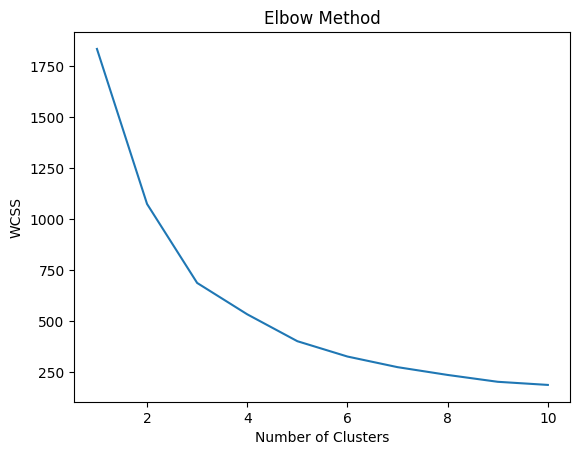

,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales
Cluster,,,
0,-0.768337,-0.776047,-0.796248
1,1.103735,0.926561,-0.116934
2,-0.369775,-0.132570,1.230270


In [174]:
# K-means

from sklearn.preprocessing import StandardScaler

# Standardize the numerical columns
num_cols = ['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df[num_cols]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

# Examine differences between clusters
df.groupby('Cluster')[num_cols].mean()

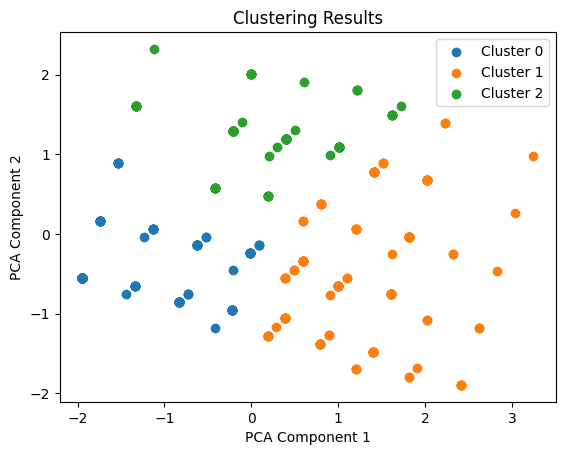

In [175]:
from sklearn.decomposition import PCA

# Reduce data dimensions from 3 to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to dataframe
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

# Plot clusters using scatter plot
plt.scatter(df.loc[df['Cluster']==0, 'PCA1'], df.loc[df['Cluster']==0, 'PCA2'], label='Cluster 0')
plt.scatter(df.loc[df['Cluster']==1, 'PCA1'], df.loc[df['Cluster']==1, 'PCA2'], label='Cluster 1')
plt.scatter(df.loc[df['Cluster']==2, 'PCA1'], df.loc[df['Cluster']==2, 'PCA2'], label='Cluster 2')
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [176]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for k=3 clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.44880667795428836


In [177]:
############################################## MODELS ###########################################################

Accuracy: 0.8366013071895425
Confusion Matrix:
 [[50  5  2]
 [ 0 66  0]
 [10  8 12]]


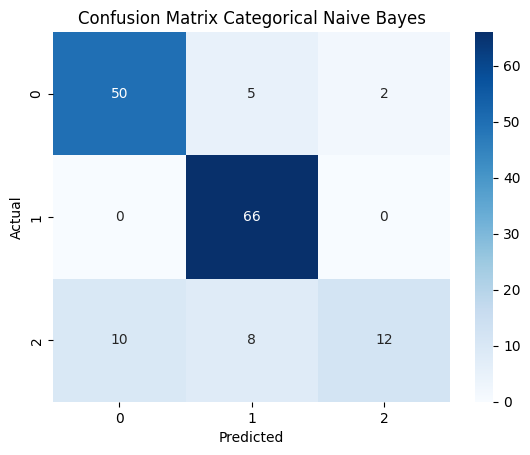

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix

# separate the target variable and the features
X = df.drop('CustomerSatisfaction', axis=1)
y = df['CustomerSatisfaction']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train the classifier
clf = CategoricalNB()
clf.fit(X_train, y_train)

# predict the target variable for the test set
y_pred = clf.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# evaluate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Categorical Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cross-validation scores: [0.6122449  0.60204082 0.6122449  0.59793814 0.63917526]
Mean accuracy: 0.6127288028613507
Accuracy Score: 0.6341463414634146

Confusion Matrix:
 [[26 18  3]
 [10 37  1]
 [ 7  6 15]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.60      0.55      0.58        47
           0       0.61      0.77      0.68        48
           1       0.79      0.54      0.64        28

    accuracy                           0.63       123
   macro avg       0.67      0.62      0.63       123
weighted avg       0.65      0.63      0.63       123



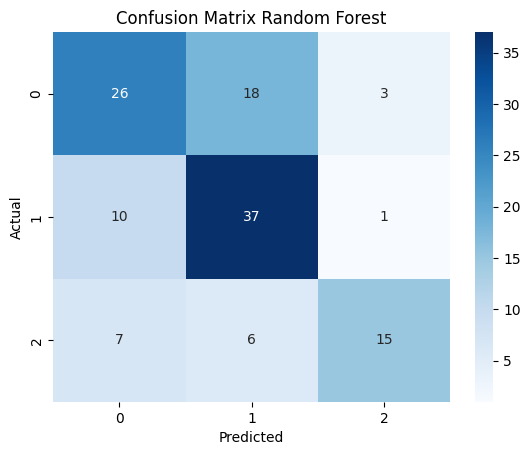

In [189]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into training and testing sets
X = df.drop('CustomerSatisfaction', axis=1) # Independent variables
y = df['CustomerSatisfaction'] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Perform 5-fold cross-validation and print the mean accuracy
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy Scores for Each Fold:  [0.73255814 0.69767442 0.69411765 0.75294118 0.75294118]
Mean Accuracy Score:  0.726046511627907

Accuracy Score: 0.8532608695652174

Confusion Matrix:
 [[56  7  6]
 [10 67  2]
 [ 2  0 34]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.81      0.82        69
           0       0.91      0.85      0.88        79
           1       0.81      0.94      0.87        36

    accuracy                           0.85       184
   macro avg       0.85      0.87      0.86       184
weighted avg       0.86      0.85      0.85       184



Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

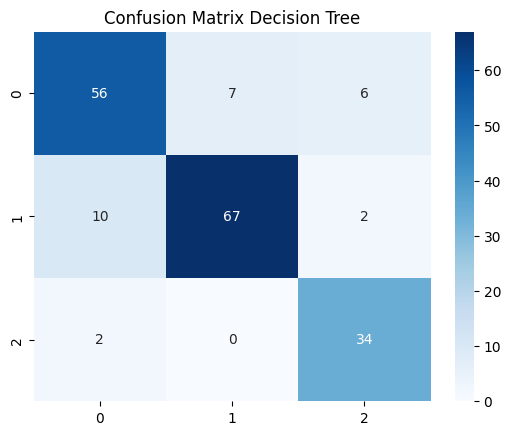

In [190]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Convert all columns to categorical data type
df = df.astype('category')

# Split the data into training and testing sets
X = df.drop('CustomerSatisfaction', axis=1) # Independent variables
y = df['CustomerSatisfaction'] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data using cross-validation
scores = cross_val_score(dt_model, X_train, y_train, cv=5)

# Print the accuracy scores for each fold and the mean accuracy score
print("Accuracy Scores for Each Fold: ", scores)
print("Mean Accuracy Score: ", scores.mean())

# Make predictions on the test data
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Evaluate the model
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Decision Tree")

Cross-validation Scores: [0.90816327 0.93877551 0.8877551  0.93814433 0.87628866]
Average Accuracy Score: 0.9098253734483486

Accuracy Score: 0.8861788617886179

Confusion Matrix:
 [[43  2  2]
 [ 4 44  0]
 [ 3  3 22]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.91      0.89        47
           0       0.90      0.92      0.91        48
           1       0.92      0.79      0.85        28

    accuracy                           0.89       123
   macro avg       0.89      0.87      0.88       123
weighted avg       0.89      0.89      0.89       123



Text(0.5, 1.0, 'Confusion Matrix Gradient Boosting Classifier')

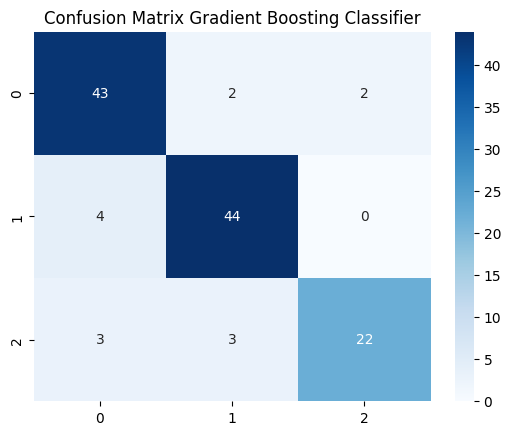

In [194]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into training and testing sets
X = df.drop('CustomerSatisfaction', axis=1) # Independent variables
y = df['CustomerSatisfaction'] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data using cross-validation
scores = cross_val_score(gb_model, X_train, y_train, cv=5)
print('Cross-validation Scores:', scores)
print('Average Accuracy Score:', scores.mean())

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Gradient Boosting Classifier")

In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLPClassifier with one hidden layer of 10 neurons
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
score = clf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))

Accuracy: 97.00%


In [195]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, n_informative=5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an MLPClassifier with one hidden layer of 10 neurons
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Perform k-fold cross validation with 5 folds
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy scores for each fold and the mean score
print("Accuracy scores for each fold: ", scores)
print("Mean accuracy score: {:.2f}%".format(scores.mean() * 100))

Accuracy scores for each fold:  [0.98  0.97  0.96  0.985 0.97 ]
Mean accuracy score: 97.30%
